In [ ]:
import keras
from keras import layers
from google.colab import drive
from keras import models
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import os,shutil

In [ ]:
drive.mount

'/content'

In [ ]:
os.getcwd()

'/content'

In [ ]:
print(len(os.listdir('/content/drive/My Drive/DS_Project/Train/dogs')),
len(os.listdir('/content/drive/My Drive/DS_Project/Train/cats')),
len(os.listdir('/content/drive/My Drive/DS_Project/Test/dogs')),
len(os.listdir('/content/drive/My Drive/DS_Project/Test/cats')),
len(os.listdir('/content/drive/My Drive/DS_Project/Validation/dogs')),
len(os.listdir('/content/drive/My Drive/DS_Project/Validation/cats')))

3023 3011 1013 1022 1004 1001


In [ ]:
print(len(os.listdir('/content/drive/My Drive/DS_Project/Train/dogs')),
len(os.listdir('/content/drive/My Drive/DS_Project/Train/cats')),
len(os.listdir('/content/drive/My Drive/DS_Project/Test/dogs')),
len(os.listdir('/content/drive/My Drive/DS_Project/Test/cats')),
len(os.listdir('/content/drive/My Drive/DS_Project/Validation/dogs')),
len(os.listdir('/content/drive/My Drive/DS_Project/Validation/cats')))

3023 3011 1013 1022 1004 1001


In [ ]:
train_dog='/content/drive/My Drive/DS_Project/Train/dogs'
train_cats='/content/drive/My Drive/DS_Project/Train/cats'
train_dir='/content/drive/My Drive/DS_Project/Train'
test_dog='/content/drive/My Drive/DS_Project/Test/dogs'
test_cats='/content/drive/My Drive/DS_Project/Test/cats'
test_dir='/content/drive/My Drive/DS_Project/Test'
val_dogs='/content/drive/My Drive/DS_Project/Validation/dogs'
val_cats='/content/drive/My Drive/DS_Project/Validation/cats'
val_dir='/content/drive/My Drive/DS_Project/Validation'

In [ ]:
import tensorflow.keras as tf

In [ ]:
model=tf.models.Sequential()

In [ ]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras import optimizers

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=0.001),metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 6032 images belonging to 2 classes.


In [ ]:
Validation_generator=train_datagen.flow_from_directory(val_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2003 images belonging to 2 classes.


In [ ]:
for data_batch, label_bath in train_generator:
  print(data_batch.shape)
  print(label_bath.shape)
  break

(20, 150, 150, 3)
(20,)


In [ ]:
data_batch[0]

array([[[0.40000004, 0.38823533, 0.17254902],
        [0.4039216 , 0.3921569 , 0.19215688],
        [0.37254903, 0.35686275, 0.16862746],
        ...,
        [0.36078432, 0.35686275, 0.16862746],
        [0.35686275, 0.3529412 , 0.16470589],
        [0.34901962, 0.34509805, 0.16470589]],

       [[0.38823533, 0.37647063, 0.16862746],
        [0.37254903, 0.36078432, 0.16078432],
        [0.36078432, 0.34509805, 0.15686275],
        ...,
        [0.3647059 , 0.36078432, 0.17254902],
        [0.36078432, 0.35686275, 0.16862746],
        [0.3529412 , 0.34901962, 0.16862746]],

       [[0.38431376, 0.37254903, 0.17254902],
        [0.36078432, 0.34509805, 0.15686275],
        [0.35686275, 0.34117648, 0.15686275],
        ...,
        [0.3647059 , 0.36078432, 0.17254902],
        [0.36078432, 0.35686275, 0.16862746],
        [0.3529412 , 0.34901962, 0.16862746]],

       ...,

       [[0.86274517, 0.86274517, 0.86274517],
        [0.86666673, 0.86666673, 0.86666673],
        [0.86666673, 0

In [ ]:
import matplotlib.pyplot as plt

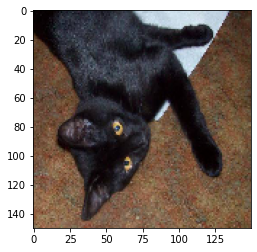

In [ ]:
plt.imshow(data_batch[1])

In [ ]:
label_bath

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1.], dtype=float32)

In [ ]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=Validation_generator,validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 1969s 20s/step - loss: 0.7302 - acc: 0.5145 - val_loss: 0.6840 - val_acc: 0.5650
Epoch 2/30
100/100 [==============================] - 1207s 12s/step - loss: 0.6995 - acc: 0.5390 - val_loss: 0.6824 - val_acc: 0.6280
Epoch 3/30
100/100 [==============================] - 732s 7s/step - loss: 0.6509 - acc: 0.6365 - val_loss: 0.5935 - val_acc: 0.6990
Epoch 4/30
100/100 [==============================] - 484s 5s/step - loss: 0.5984 - acc: 0.6990 - val_loss: 0.5460 - val_acc: 0.7340
Epoch 5/30
100/100 [==============================] - 336s 3s/step - loss: 0.5688 - acc: 0.7065 - val_loss: 0.5691 - val_acc: 0.6970
Epoch 6/30
100/100 [==============================] - 225s 2s/step - loss: 0.5622 - acc: 0.7155 - val_loss: 0.9842 - val_acc: 0.6120
Epoch 7/30
100/100 [==============================] - 169s 2s/step - loss: 0.5281 - acc: 0.7440 - val_loss: 0.5464 - val_a

In [ ]:
model.save('cat_dog')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cat_dog/assets


In [ ]:
model=keras.models.load_model('cat_dog')

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

In [ ]:
img=image.load_img('/content/drive/My Drive/DS_Project/Test/cats/cat.4001.jpg',target_size=(150,150))

In [ ]:
test=img_to_array(img)/255

In [ ]:
test=np.expand_dims(test,axis=0)

In [ ]:
test.shape

(1, 150, 150, 3)

In [ ]:
gen=ImageDataGenerator(rotation_range=45,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

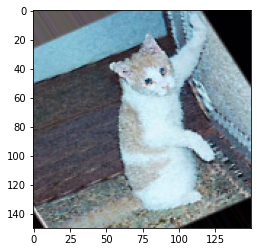

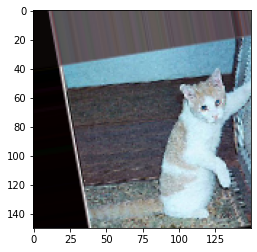

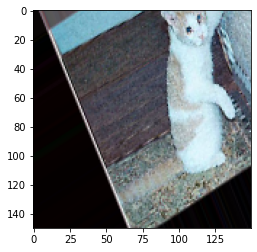

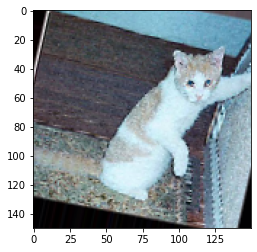

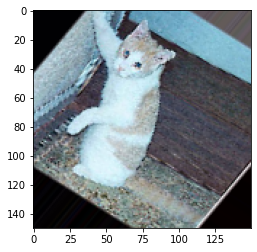

In [ ]:
i=0
for batch in gen.flow(test,batch_size=1):
  plt.figure(i)
  imgplot=plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i%5==0:
    break
plt.show()

In [ ]:
model.predict_classes(test)

array([[1]], dtype=int32)

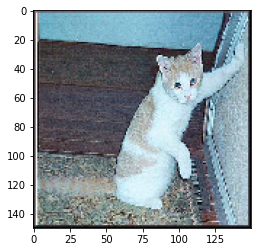

In [ ]:
plt.imshow(img)

In [ ]:
batch.shape

(1, 150, 150, 3)